<center>Устранение избыточности в данных.</center>
<center>Шокуров Антон В.</center>
<center>shokurov.anton.v@yandex.ru</center>
<center>http://машинноезрение.рф</center>
<center>Версия 0.12</center>

<center>Анотация</center>
<p>
В данной заметке подйет речь о преобразования над самими признаками, т.е. над матрицей X.
Значения каждого из прецендента нам не важно.
Постараемся из X выжать как можно больше данных.
</p>
<p>Это предварительная версия! Любые замечания приветсвуются.</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<h1>Метод Главных Компонент</h1>

<h2>Синтезированные примеры</h2>

<b>Формирование данных на приямой, которая под углом.</b>

In [2]:
# Сгенерируем данные
x = np.random.uniform(-10, 10, 30) # Раномерная выборка на отрезке [-10, 10] в количестве 30 элементов.
x.shape

(30,)

In [6]:
X = np.row_stack( (x, np.zeros_like(x) ) ) # Две строчки -- к каждому числу добавлена вторая координата (равная 0).
X # Выводим матрицу.

array([[-3.79021703, -9.93615336, -0.08030311,  3.61752397, -2.32319908,
         4.69922803,  7.08264398,  6.68035858, -2.23433375,  7.87447214,
        -5.49766374, -9.78907916,  6.03971087,  4.76407609, -7.30897873,
        -5.20708954,  4.1931566 , -5.82726088,  5.37182823,  9.52816904,
         2.06613297,  0.07452426, -1.44172528,  0.14925882,  4.25998436,
         1.37840867,  3.07715739,  3.16730934, -8.13191701, -1.00675523],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

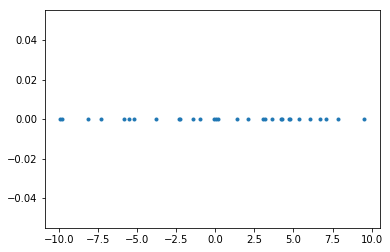

In [7]:
plt.plot(X[0,:], X[1,:], ".") # Нарисуем их
# Они находятся на прямой.

In [8]:
# Теперь подкрутим данные. Разместим их на под уголом.
theta = np.radians( 30 ) # Градусы в радианы.
c, s = np.cos(theta), np.sin(theta) # Поэлементвное присвоение,
# Фактически эквивалентно:
# c = np.cos(theta)
# s = np.sin(theta)

In [10]:
XX = R.dot(X) + T # Применяем к нашим данным вращение и трансляцию.
XXt = XX.transpose()
XXt

array([[ -0.78242424,  -3.19510852],
       [ -6.10496122,  -6.26807668],
       [  2.43045546,  -1.34015156],
       [  5.63286766,   0.50876198],
       [  0.48805058,  -2.46159954],
       [  6.56965085,   1.04961401],
       [  8.63374961,   2.24132199],
       [  8.28536024,   2.04017929],
       [  0.56501021,  -2.41716687],
       [  9.31949291,   2.63723607],
       [ -2.26111646,  -4.04883187],
       [ -5.97759124,  -6.19453958],
       [  7.73054304,   1.71985543],
       [  6.62581092,   1.08203804],
       [ -3.82976126,  -4.95448937],
       [ -2.00947182,  -3.90354477],
       [  6.13138014,   0.7965783 ],
       [ -2.54655596,  -4.21363044],
       [  7.15213971,   1.38591412],
       [ 10.75163644,   3.46408452],
       [  4.28932364,  -0.26693352],
       [  2.5645399 ,  -1.26273787],
       [  1.25142928,  -2.02086264],
       [  2.62926193,  -1.22537059],
       [  6.18925468,   0.82999218],
       [  3.69373693,  -0.61079566],
       [  5.16489647,   0.2385787 ],
 

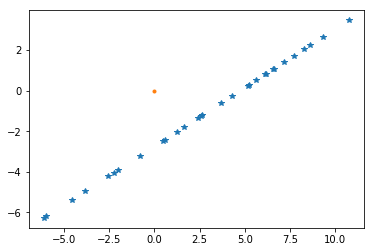

In [12]:
plt.plot(XXt[:,0], XXt[:,1], "*", 0, 0, ".")
# Данные теперь под углом. Ордината (красная точка) находится сбоку.

<b>Метод главных компонент (PCA), данные на прямой.</b>

Как восстановить их? Как устранить факт того, что они под уголом?
Для этого есть метод главных компонент.

Он позволяет снизить размерность данных, т.е. найти подпространство, которое содержит данные.
Самое пространство и преобразование линейны.

In [15]:
# Загружаем метод главных компонент (PCA -- Principal component analysis):
from sklearn.decomposition import PCA

In [16]:
# PCA это конструктор объектов. Для выполнения вычислений нужно объект создать.
# Самое главное задать требуемое размер пространства.
pca = PCA( n_components = 1 ) # Хотим преобзовать данные к прямой, т.е. сделать их одномерными (как были исходные).

In [18]:
pca.fit( XXt ) # Запускаем метод pca на данных XXt, т.е. ишим подплоскость (смещение и поворот) содержащую данные.
# Выводятся используемые значения параметров метода.

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [20]:
XXtd = pca.transform( XXt ) # Применяем найденное (сохраненное в объекте pca) преобразование к данным.
XXtd

array([[  4.17185928],
       [ 10.3177956 ],
       [  0.46194536],
       [ -3.23588172],
       [  2.70484133],
       [ -4.31758578],
       [ -6.70100173],
       [ -6.29871633],
       [  2.615976  ],
       [ -7.49282989],
       [  5.87930598],
       [ 10.17072141],
       [ -5.65806862],
       [ -4.38243384],
       [  7.69062098],
       [  5.58873178],
       [ -3.81151436],
       [  6.20890313],
       [ -4.99018599],
       [ -9.14652679],
       [ -1.68449072],
       [  0.30711799],
       [  1.82336753],
       [  0.23238343],
       [ -3.87834211],
       [ -0.99676642],
       [ -2.69551514],
       [ -2.78566709],
       [  8.51355926],
       [  1.38839747]])

In [21]:
pca.explained_variance_ratio_ # Хорошо-ли данные коррелируют с вычисленным преобзованием?
# Фактически говорит о том насколько хорошо удалось снизить размерность,
# много ли данных оказалось искаженными (спроецированными с сильным смещением)
# 1 -- 100% по данных по первой оси (она же единственная).

array([ 1.])

In [25]:
# Теперь нужно сравнить восстановленные данные с исходными. Для этого их нужно привести к нормальному виду:
from sklearn import preprocessing # preprocessing -- первичные преобразования данных.
# Будем применять preprocessing.scale -- делает выборочное среднее равно нулю, а дисперсию равной 1.
# Иногда, для корретной работы примера, требуется:
# XXtd = -XXtd # см ниже.
XXtds = preprocessing.scale( XXtd[:, 0] ) # Нормируем. Используем функию scale из модуля sklearn.preprocessing.
XXtds

array([-0.77869072, -1.92584917, -0.08622356,  0.60398755, -0.50486719,
        0.80589104,  1.25076316,  1.17567532, -0.48828019,  1.39856039,
       -1.09739105, -1.89839731,  1.0560964 ,  0.81799513, -1.43547872,
       -1.04315446,  0.7114312 , -1.1589114 ,  0.93143399,  1.70722814,
        0.31441552, -0.05732454, -0.34033731, -0.0433751 ,  0.72390482,
        0.1860496 ,  0.50312642,  0.51995357, -1.58908275, -0.25914878])

In [26]:
xs = preprocessing.scale( x ) # x -- это исходные даные. Их тоже нормируем.
xs

array([-0.77869072, -1.92584917, -0.08622356,  0.60398755, -0.50486719,
        0.80589104,  1.25076316,  1.17567532, -0.48828019,  1.39856039,
       -1.09739105, -1.89839731,  1.0560964 ,  0.81799513, -1.43547872,
       -1.04315446,  0.7114312 , -1.1589114 ,  0.93143399,  1.70722814,
        0.31441552, -0.05732454, -0.34033731, -0.0433751 ,  0.72390482,
        0.1860496 ,  0.50312642,  0.51995357, -1.58908275, -0.25914878])

In [27]:
# Вычислим расстояние между векторами, т.е. отнормированными данными.
np.linalg.norm((xs - XXtds)) # Вызываем функцию из модуля, без from...
# Длина фактически равна нулю. Значит данные были восстановлены полностью.
# Если норма не равна нулю, то требуется массив отразить. см выше: XXtd = -XXtd. Нужно убрать комментарий.

5.6063514599425254e-16

In [28]:
# Что будет если на две оси спроецировать?
pca = PCA( n_components = 2 ) # Настраиваем объект на двумерную плоскость.
XXtd = pca.fit_transform( XXt ) # Настроим параметры модели и сразу преобразуем данные к двум компонентам.
XXtd # Видим, что даные состоят из двумерных точек. Вторая компонента фактически равна нулю (машинное эпсилон).

array([[  4.17185928e+00,   5.79130022e-15],
       [  1.03177956e+01,   1.95027060e-16],
       [  4.61945362e-01,   2.26025310e-16],
       [ -3.23588172e+00,   3.66389924e-16],
       [  2.70484133e+00,   2.44763029e-17],
       [ -4.31758578e+00,   4.19669434e-16],
       [ -6.70100173e+00,  -5.09363374e-17],
       [ -6.29871633e+00,  -4.57286002e-17],
       [  2.61597600e+00,  -9.30070562e-18],
       [ -7.49282989e+00,   1.33619430e-16],
       [  5.87930598e+00,   7.31412061e-17],
       [  1.01707214e+01,   3.26832719e-17],
       [ -5.65806862e+00,   2.55000038e-16],
       [ -4.38243384e+00,   1.19321715e-16],
       [  7.69062098e+00,  -8.52148351e-16],
       [  5.58873178e+00,  -9.92787686e-18],
       [ -3.81151436e+00,   3.59835344e-16],
       [  6.20890313e+00,  -1.38974650e-16],
       [ -4.99018599e+00,   4.88466248e-16],
       [ -9.14652679e+00,   7.13289751e-16],
       [ -1.68449072e+00,   2.48014602e-16],
       [  3.07117989e-01,   2.18244052e-16],
       [  

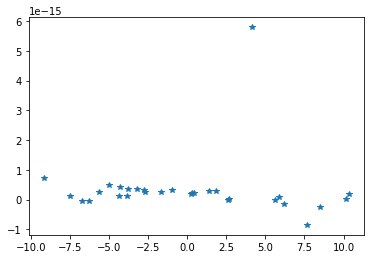

In [30]:
# Построим преобращованные (с целью снижения размерность) точки.
plt.plot(XXtd[:,0], XXtd[:,1], "*" ) # Но график будет обманчевым. Ось по y отмасштабирована (разные масштабы)!

(-10.119742910794514,
 11.291011723181548,
 -1.1843207791612844e-15,
 6.1234726449487931e-15)

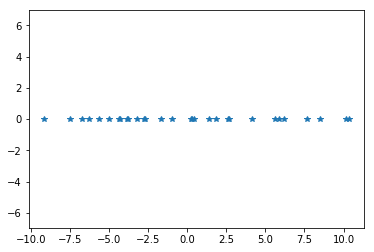

In [32]:
plt.plot(XXtd[:,0], XXtd[:,1], "*" )
plt.axis('equal') # Деламем оси одинакового масштаба.
# Правильнее так. Теперь видно, что данные расположены вдоль оси x.

In [33]:
pca.explained_variance_ratio_ # Теперь тоже проверяем насколько хорошо данные коррелируют с осями.
# Видно, что первая ось все содержит. Для второй оси коеффициент равен 0.

array([  1.00000000e+00,   4.21939259e-32])

Видно, что увеличиение количества осей мы не теряем информацию о том, что данные на самом деле одномерные.

<b>Метод главных компонент (PCA), данные на прямой плюс шум</b>

In [35]:
# Добавим шума (к y, раньше он был раен 0)
X[1,:] = np.random.randn( (30) )/4 # вторая компонента содержит номальный шум, раньше там был 0.
XX = R.dot(X) + T # Как и раньше применяем вращение и трансляцию.
XXt = XX.transpose() # Для удобства. Например, при вызове plot, fit_transform.

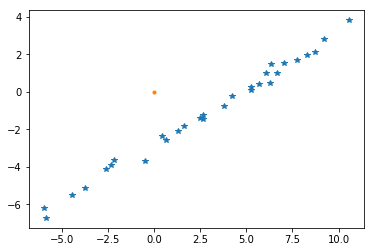

In [36]:
plt.plot(XXt[:,0], XXt[:,1], "*", 0, 0, ".")

In [38]:
pca = PCA( n_components = 1 ) # Настраиваем объект на одну компоненту.
XXtd = pca.fit_transform( XXt ) # Ищим параметры преобразования и преобразуем.

In [39]:
pca.explained_variance_ratio_ # Теперь важность первой оси немного упала. Но совсем немного!

array([ 0.99836271])

In [40]:
# Теперь спроецируем на две оси.
pca = PCA( n_components = 2 )
XXtd = pca.fit_transform( XXt )
XXtd # Видно, что вторая компонента фактически равна шуму.

array([[  4.17976365e+00,   4.72057748e-01],
       [  1.03244273e+01,   3.42668248e-01],
       [  4.62665750e-01,   4.23823930e-02],
       [ -3.23449763e+00,   1.13715998e-01],
       [  2.70168517e+00,  -2.22710627e-01],
       [ -4.32536011e+00,  -4.62613230e-01],
       [ -6.69842137e+00,   2.17233669e-01],
       [ -6.29748569e+00,   1.27899808e-01],
       [  2.61835436e+00,   1.31384094e-01],
       [ -7.49538449e+00,  -1.04452351e-01],
       [  5.87596218e+00,  -2.59548313e-01],
       [  1.01695706e+01,  -1.53122283e-01],
       [ -5.65754808e+00,   7.75408528e-02],
       [ -4.38122695e+00,   1.11378445e-01],
       [  7.69215654e+00,   3.78344563e-02],
       [  5.58289249e+00,  -4.16619762e-01],
       [ -3.80609991e+00,   3.75576208e-01],
       [  6.20628634e+00,  -2.15707009e-01],
       [ -4.99302178e+00,  -1.42003231e-01],
       [ -9.15237584e+00,  -3.01866609e-01],
       [ -1.68594845e+00,  -7.98918482e-02],
       [  3.09950200e-01,   1.78442430e-01],
       [  

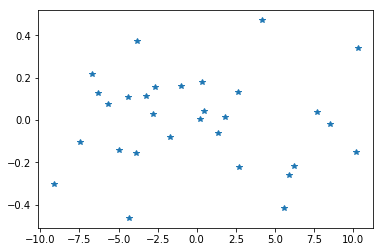

In [41]:
plt.plot(XXtd[:,0], XXtd[:,1], "*" ) # Но график как и раньше будет обманный. Ось по y отмасштабирована!

(-10.126215993737135,
 11.298267416997872,
 -0.50934677837983511,
 0.51879129673920255)

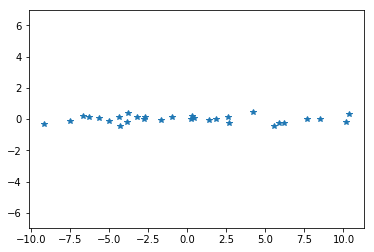

In [42]:
plt.plot(XXtd[:,0], XXtd[:,1], "*" ) # Правильнее так. Теперь видно, что данные расположены вдоль оси x.
plt.axis('equal') # Деламем оси одинакового масштаба. Вдоль y расположен шум.

In [43]:
pca.explained_variance_ratio_ # Теперь тоже проверяем насколько хорошо данные коррелируют с осями.
# Видно, что первая ось содержит почти все. Для второй оси коеффициент почти равен 0, но не 0.

array([ 0.99836271,  0.00163729])

In [44]:
XXtd[:,1] # Это шум.

array([ 0.47205775,  0.34266825,  0.04238239,  0.113716  , -0.22271063,
       -0.46261323,  0.21723367,  0.12789981,  0.13138409, -0.10445235,
       -0.25954831, -0.15312228,  0.07754085,  0.11137845,  0.03783446,
       -0.41661976,  0.37557621, -0.21570701, -0.14200323, -0.30186661,
       -0.07989185,  0.17844243,  0.01618308,  0.00579385, -0.15770166,
        0.16168714,  0.15766523,  0.02709009, -0.020871  , -0.05942582])

In [45]:
import scipy.stats as models
models.norm.fit( XXtd[:,1] )[1], models.norm.fit( X[1,:] )[1]
# Почти как исходное 1/4 = 0.25. У исходного и преобразованного оценка почти совпадает.

(0.21698844426938302, 0.23262027162376042)

<b>Аналогичный пример в 3d</b>

данные находятся в плоскости.

In [94]:
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [95]:
e = np.exp(1)
np.random.seed(4)


def pdf(x):
    return 0.5 * (stats.norm(scale=0.25 / e).pdf(x)
                  + stats.norm(scale=4 / e).pdf(x))

y = np.random.normal(scale=0.5, size=(30000))
x = np.random.normal(scale=0.5, size=(30000))
z = np.random.normal(scale=0.1, size=len(x))

density = pdf(x) * pdf(y)
pdf_z = pdf(5 * z)

density *= pdf_z

a = x + y
b = 2 * y
c = a - b + z

norm = np.sqrt(a.var() + b.var())
a /= norm
b /= norm

In [96]:
def plot_figs(fig_num, elev, azim):
    fig = plt.figure(fig_num, figsize=(8, 6))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=elev, azim=azim)

    ax.scatter(a[::10], b[::10], c[::10], c=density[::10], marker='+', alpha=.4)
    Y = np.c_[a, b, c]

    # Using SciPy's SVD, this would be:
    # _, pca_score, V = scipy.linalg.svd(Y, full_matrices=False)

    pca = PCA(n_components=3)
    pca.fit(Y)
    pca_score = pca.explained_variance_ratio_
    V = pca.components_

    x_pca_axis, y_pca_axis, z_pca_axis = V.T * pca_score / pca_score.min()

    x_pca_axis, y_pca_axis, z_pca_axis = 3 * V.T
    x_pca_plane = np.r_[x_pca_axis[:2], - x_pca_axis[1::-1]]
    y_pca_plane = np.r_[y_pca_axis[:2], - y_pca_axis[1::-1]]
    z_pca_plane = np.r_[z_pca_axis[:2], - z_pca_axis[1::-1]]
    x_pca_plane.shape = (2, 2)
    y_pca_plane.shape = (2, 2)
    z_pca_plane.shape = (2, 2)
    ax.plot_surface(x_pca_plane, y_pca_plane, z_pca_plane)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

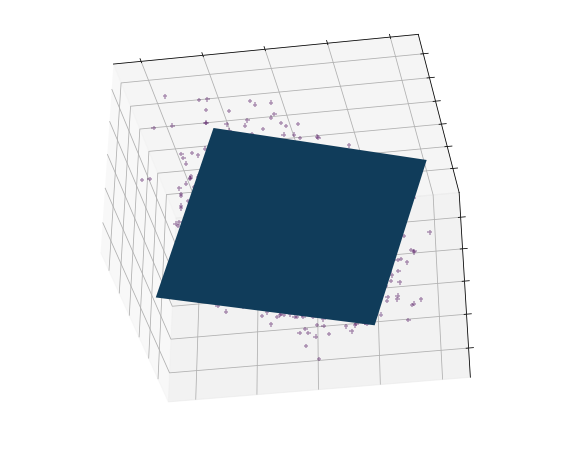

In [97]:
elev = -40
azim = -80
plot_figs(1, elev, azim)

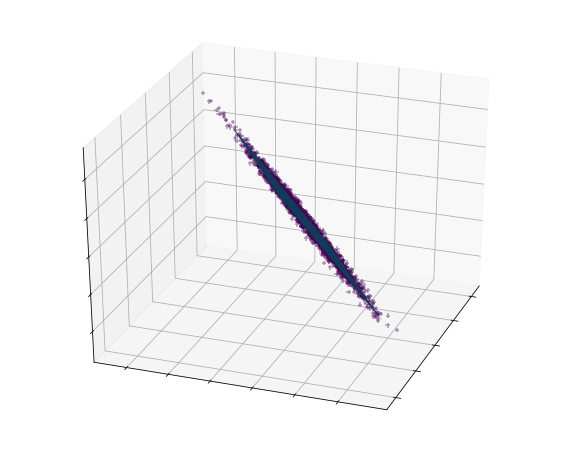

In [98]:
elev = 30
azim = 20
plot_figs(2, elev, azim)

<b>Другие примеры с PCA</b>

In [46]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
X

array([[-1, -1],
       [-2, -1],
       [-3, -2],
       [ 1,  1],
       [ 2,  1],
       [ 3,  2]])

(-3.2999999999999998,
 3.2999999999999998,
 -2.2000000000000002,
 2.2000000000000002)

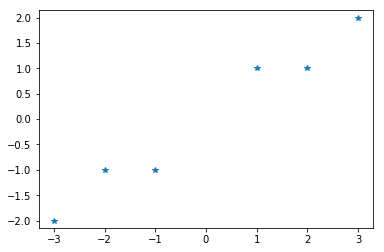

In [47]:
plt.plot(X[:,0], X[:,1], "*")
plt.axis('equal')

In [48]:
pca = PCA(n_components=2)

In [49]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [50]:
print(pca.explained_variance_ratio_) 

[ 0.99244289  0.00755711]


In [51]:
print(pca.singular_values_)

[ 6.30061232  0.54980396]


In [52]:
X2 = pca.transform(X)
X2

array([[ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385],
       [-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385]])

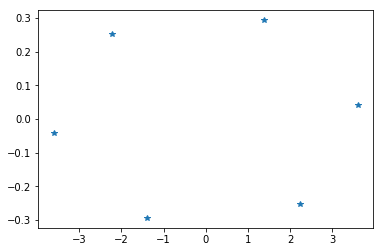

In [97]:
plt.plot(X2[:,0], X2[:,1], "*")
#plt.axis('equal')

In [55]:
pca_full = PCA(n_components=2, svd_solver='full')
pca_full.fit( X )

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [56]:
pca_arpack = PCA(n_components=1, svd_solver='arpack') #долюно быть n_components < n_features
pca_arpack.fit( X )

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='arpack', tol=0.0, whiten=False)

In [57]:
X_arpack=pca_arpack.transform(X)
X_arpack

array([[ 1.38340578],
       [ 2.22189802],
       [ 3.6053038 ],
       [-1.38340578],
       [-2.22189802],
       [-3.6053038 ]])

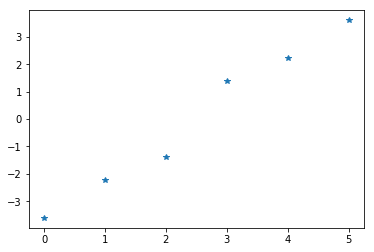

In [58]:
plt.plot(np.sort(X_arpack[:,0]), "*")

<center>Ядровый Метод Главных Компонент</center>
<center>Kernel PCA</center>
Выделяемые компоненты совсем не обязательно должны быть "прямыми". Они могут быть и кривыми засчет подмены понятия скалярного произведения. Оно заменяется на так называемое ядро.

In [76]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles

In [77]:
# Для обеспечения повтаряемости эксперимента
np.random.seed(0)

In [78]:
# Создадим "кривые" данные, две концентрические окружности с центром в точке (0, 0)
X, y = make_circles(n_samples=400, factor=.3, noise=.05)
X.shape, y.shape

((400, 2), (400,))

In [79]:
np.unique(y)

array([0, 1])

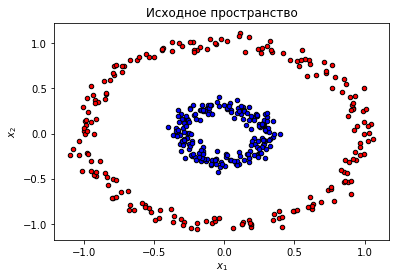

In [80]:
plt.title("Исходное пространство")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

In [81]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

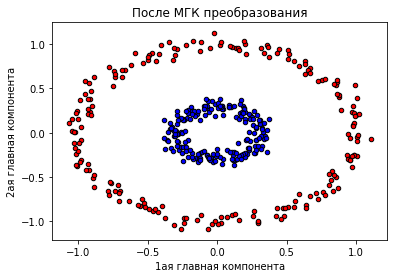

In [82]:
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("После МГК преобразования")
plt.xlabel("1ая главная компонента")
plt.ylabel("2ая главная компонента")

В общем ничего не поменялось.
Теперь пробуем ядровый метод главных компонент.

In [83]:
kpca = KernelPCA(n_components=2, kernel="rbf", fit_inverse_transform=True, gamma=10) # Ядро rbf, radial basis function
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)

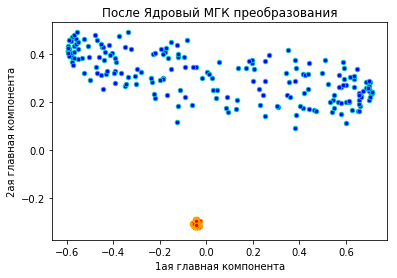

In [84]:
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='orange')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='c')
plt.title("После Ядровый МГК преобразования")
plt.xlabel("1ая главная компонента")
plt.ylabel("2ая главная компонента")

Исходные два множества четко разделились.

Начертим кривые координаты.

In [85]:
l = np.linspace(-1.5, 1.5, 5)
l

array([-1.5 , -0.75,  0.  ,  0.75,  1.5 ])

In [86]:
grid = np.meshgrid( l, l )
grid

[array([[-1.5 , -0.75,  0.  ,  0.75,  1.5 ],
        [-1.5 , -0.75,  0.  ,  0.75,  1.5 ],
        [-1.5 , -0.75,  0.  ,  0.75,  1.5 ],
        [-1.5 , -0.75,  0.  ,  0.75,  1.5 ],
        [-1.5 , -0.75,  0.  ,  0.75,  1.5 ]]),
 array([[-1.5 , -1.5 , -1.5 , -1.5 , -1.5 ],
        [-0.75, -0.75, -0.75, -0.75, -0.75],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.75,  0.75,  0.75,  0.75,  0.75],
        [ 1.5 ,  1.5 ,  1.5 ,  1.5 ,  1.5 ]])]

In [87]:
grid[0][1,3],grid[1][1,3]

(0.75, -0.75)

In [88]:
type(grid), len(grid) #! Это список, а не массив !

(list, 2)

In [89]:
grid[0]

array([[-1.5 , -0.75,  0.  ,  0.75,  1.5 ],
       [-1.5 , -0.75,  0.  ,  0.75,  1.5 ],
       [-1.5 , -0.75,  0.  ,  0.75,  1.5 ],
       [-1.5 , -0.75,  0.  ,  0.75,  1.5 ],
       [-1.5 , -0.75,  0.  ,  0.75,  1.5 ]])

In [90]:
grid[1]

array([[-1.5 , -1.5 , -1.5 , -1.5 , -1.5 ],
       [-0.75, -0.75, -0.75, -0.75, -0.75],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.75,  0.75,  0.75,  0.75,  0.75],
       [ 1.5 ,  1.5 ,  1.5 ,  1.5 ,  1.5 ]])

In [91]:
np.ravel([[1, 2],[3,4]]) # выпрямляет массив в одномерный, схоже с flatten

array([1, 2, 3, 4])

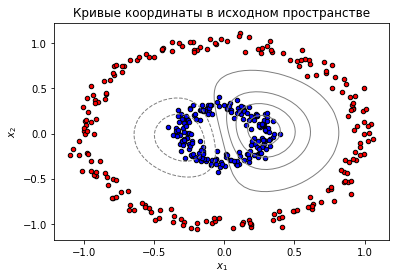

In [92]:
plt.title("Кривые координаты в исходном пространстве")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')

X1, X2 = np.meshgrid(np.linspace(-1.0, 1.0, 50), np.linspace(-1.0, 1.0, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

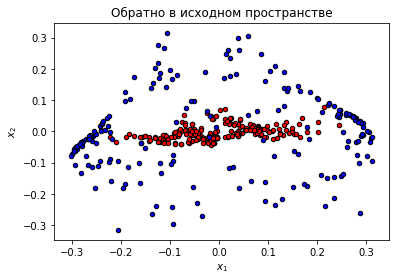

In [93]:
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Обратно в исходном пространстве")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

<h2>Метод главных компонент на примере Iris dataset</h2>

In [59]:
# Загрузка данных из самой бибилотеки. 
from sklearn import datasets # В dataset есть нексолько традиционых наборов.

In [61]:
iris = datasets.load_iris()

X = iris.data # Сами данные
y = iris.target # Класс, в данной заметке он нужен нам только для визуализации.
target_names = iris.target_names # Имена классов.
X.shape, y.shape, target_names.shape # Покажем чему раны размеры.

((150, 4), (150,), (3,))

Инача говоря данные содержат 150 примеров.
Для каждого примера заданы 4 признака, а также разметку (чем пример является).
Для числовых обозначений классов даны соответствующие текстовые названия.

In [62]:
X # Данные, четыре признака. 150 примера (прецендента).

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [63]:
y # Класса. Фактически сначала идут преценденты относящиеся к первому классу, потом второму, а уже потом третьему.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [64]:
target_names # Имена классов, т.е. 0 классу соответствует имя setosa, ..., 2 -- virginica
# Да, тип элементов может быть текстом!

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [65]:
np.unique(y) # Найдем номера различающихся классов. Функция ищет уникальные элементы массива.

array([0, 1, 2])

In [67]:
# Напомню.
y * 2 + 1 # Выполняет данное вычисление поэлементно. 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [68]:
# По аналогии.
y==1 # Применили проверку на равенство 1 для каждого из элементов массива. Истина -- True, ложь -- False.

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [70]:
# Напечатам размер каждого из классов, т.е. количество прецендентов в каждом классе.
# Далее идет так называемый цикл, конкретно цикл for. Он выполняет некий код для каждого из элементов по одному.
for i in np.unique(y): # i пробегает список элементов [0,1,2], т.е. принимает каждое из данных значений по отдельности.
    # Тело начинается с отступа. Замечу, в предыдущей строчке в конце был символ :!
    print( "размер класса ", i, sum( y==i ) ) # Для каждого из жлементов выполянется данный код. Идет печать.
    # В арифметических операциях истина (True) равна 1, а лож (False).
# Видим, что классы имеют один и тот же размер, равный 50.

размер класса  0 50
размер класса  1 50
размер класса  2 50


In [72]:
nums = np.unique(y) # Фактически это [0, 1, 2]
list( zip( nums, target_names ) ) # Списки сшиваются по-элементно вместе. Как молния с бегунком у куртки.
# nums[0] и target_names[0] в первый элемент нового списка... (0, 'setosa') ... и так далее
# по аналогии все далается при большем количестве списоков. Рзамеры их должны сопадать!

[(0, 'setosa'), (1, 'versicolor'), (2, 'virginica')]

In [73]:
X_1 = X[ y == 1 ] # Выбираем только те элементы для которых условие истинно, т.е. относящиеся к классу 1.
X_1

array([[ 7. ,  3.2,  4.7,  1.4],
       [ 6.4,  3.2,  4.5,  1.5],
       [ 6.9,  3.1,  4.9,  1.5],
       [ 5.5,  2.3,  4. ,  1.3],
       [ 6.5,  2.8,  4.6,  1.5],
       [ 5.7,  2.8,  4.5,  1.3],
       [ 6.3,  3.3,  4.7,  1.6],
       [ 4.9,  2.4,  3.3,  1. ],
       [ 6.6,  2.9,  4.6,  1.3],
       [ 5.2,  2.7,  3.9,  1.4],
       [ 5. ,  2. ,  3.5,  1. ],
       [ 5.9,  3. ,  4.2,  1.5],
       [ 6. ,  2.2,  4. ,  1. ],
       [ 6.1,  2.9,  4.7,  1.4],
       [ 5.6,  2.9,  3.6,  1.3],
       [ 6.7,  3.1,  4.4,  1.4],
       [ 5.6,  3. ,  4.5,  1.5],
       [ 5.8,  2.7,  4.1,  1. ],
       [ 6.2,  2.2,  4.5,  1.5],
       [ 5.6,  2.5,  3.9,  1.1],
       [ 5.9,  3.2,  4.8,  1.8],
       [ 6.1,  2.8,  4. ,  1.3],
       [ 6.3,  2.5,  4.9,  1.5],
       [ 6.1,  2.8,  4.7,  1.2],
       [ 6.4,  2.9,  4.3,  1.3],
       [ 6.6,  3. ,  4.4,  1.4],
       [ 6.8,  2.8,  4.8,  1.4],
       [ 6.7,  3. ,  5. ,  1.7],
       [ 6. ,  2.9,  4.5,  1.5],
       [ 5.7,  2.6,  3.5,  1. ],
       [ 5

In [75]:
X_1.shape, sum(y==1) # Перепроверяем размеры.

((50, 4), 50)

In [77]:
X[y == 1, 0] # Берем массив нулевых признаков отсносящихся к классу 1. Фактически 0ой вектор-столбец из X_1.
# Иначе говоря, идет проекция всего признакового пространства (там было 4 признака) на 0 ось.

array([ 7. ,  6.4,  6.9,  5.5,  6.5,  5.7,  6.3,  4.9,  6.6,  5.2,  5. ,
        5.9,  6. ,  6.1,  5.6,  6.7,  5.6,  5.8,  6.2,  5.6,  5.9,  6.1,
        6.3,  6.1,  6.4,  6.6,  6.8,  6.7,  6. ,  5.7,  5.5,  5.5,  5.8,
        6. ,  5.4,  6. ,  6.7,  6.3,  5.6,  5.5,  5.5,  6.1,  5.8,  5. ,
        5.6,  5.7,  5.7,  6.2,  5.1,  5.7])

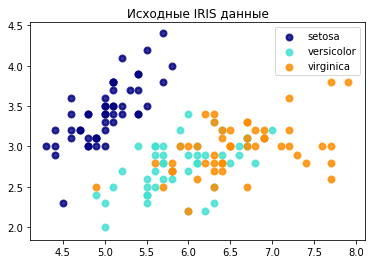

In [78]:
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names): # Хитрым образом записаный цикл for.
    plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=.8, lw=lw, # Отрисовываем каждый класс по отдельности.
                label=target_name) # Названия наборов данных.
plt.legend(loc='best', shadow=False, scatterpoints = 1 ) # Отображение легенды.
plt.title('Исходные IRIS данные') # Название графика.

Синий класс можно почти отделить, а вот оранжевый и берюзовый скорее нет.
Как быть?
Приобразуем систему координат так, что бы было видно.
Обращаю внимание: исходные даные 4х мерные, а картинка 2х мерная.

Упр. Изучить другие проекции.

In [81]:
pca = PCA(n_components=2, svd_solver='full')
X_r = pca.fit_transform(X) # Сразу строим модель и преобразуем.

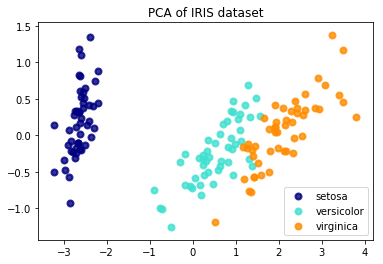

In [82]:
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

Теперь данные гораздо проще отделить данные друг отдруга. По крайней мере можно провести четкую границу/ломанную между классами.

<b>Посмотрим на все это дело в 3d</b>

In [71]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
np.random.seed(5)

In [72]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [73]:
np.choose([0, 2, 1, 2], ['a','b','c']) # Один список используется для индексации элементов из второго списка

array(['a', 'c', 'b', 'c'],
      dtype='<U1')

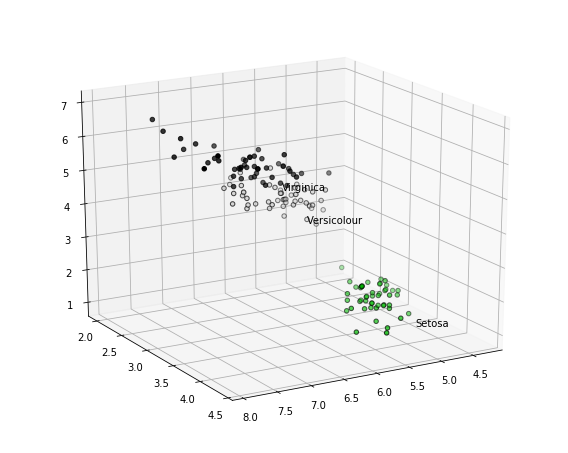

In [74]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.0,
              X[y == label, 2].mean(), name,
              horizontalalignment='center')
              
# Отрисовываем данные.
yy = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=yy, cmap=plt.cm.spectral, edgecolor='k')

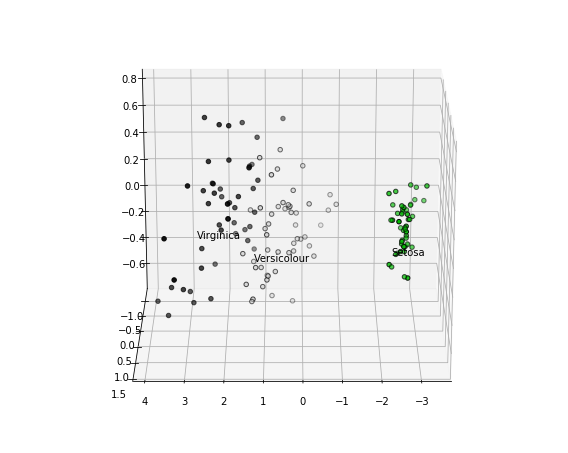

In [75]:
pca = decomposition.PCA(n_components=3)
pca.fit(X)
Xpca = pca.transform(X)

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=90)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(Xpca[y == label, 0].mean(),
              Xpca[y == label, 1].mean() + 1.0,
              Xpca[y == label, 2].mean(), name,
              horizontalalignment='center')
              
# Отрисовываем данные.
yy = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c=yy, cmap=plt.cm.spectral, edgecolor='k')

<h1>Ослабим часть условий на метод главных компонент</h1>

In [83]:
# В Методе главных компонент считалось, что разброс энергии (шума) постоянен по всем осям.
# В данном методе каждая из ортогональных осей независима.
from sklearn.decomposition import FactorAnalysis

In [85]:
fa = FactorAnalysis( n_components=2 )
X_fa = fa.fit_transform(X)

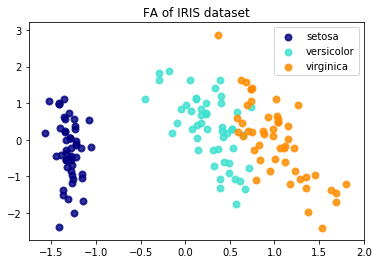

In [87]:
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_fa[y == i, 0], X_fa[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('FA of IRIS dataset')

Когда будет разница видна?

В методе гоавных компонентов оси ортонормированы. Это жесткое требование.
от него можно отказатся применив следующий подход.

<b>Еще более общий случай метода главных компонент</b>

In [88]:
# Теперь оси необязательно ортогональны
from sklearn.decomposition import FastICA

In [89]:
# ?rng

In [90]:
# Создадим данные
rng = np.random.RandomState(42)
S = rng.standard_t(1.5,  size=(20000, 2))  #standard_t 1.5,  size=(20000, 2) randn
S[:, 0] *= 2.
S, S.shape

(array([[  0.84805472,  -0.41316453],
        [ 36.41730631,   0.53773481],
        [ -1.76643788,  -0.67843317],
        ..., 
        [ -1.35307067,   1.32228283],
        [ -3.47661776, -29.51830934],
        [ -5.41834779,   0.1860394 ]]), (20000, 2))

(-3, 3)

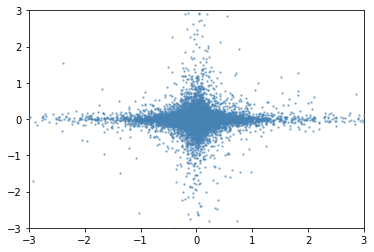

In [91]:
SS = S / S.std()
plt.scatter(SS[:, 0], SS[:, 1], s=2, marker='o', zorder=10,
                color='steelblue', alpha=0.5)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

(-3, 3)

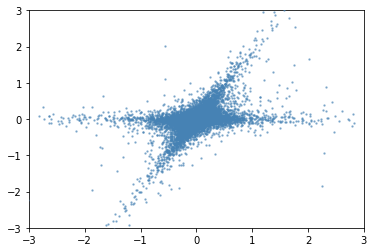

In [92]:
# Смешиваем данные распределенные по разным осям
A = np.array([[1, 1], [0, 2]])  # Матрица смешивания
X = np.dot(S, A.T)  # Формируем наблюдения
XX = X / X.std()
plt.scatter(XX[:, 0], XX[:, 1], s=2, marker='o', zorder=10,
                color='steelblue', alpha=0.5)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

In [93]:
pca = FactorAnalysis() #PCA()
S_pca_ = pca.fit(X).transform(X)

ica = FastICA(random_state=rng)
S_ica_ = ica.fit(X).transform(X)  # Estimate the sources

S_ica_ /= S_ica_.std(axis=0)

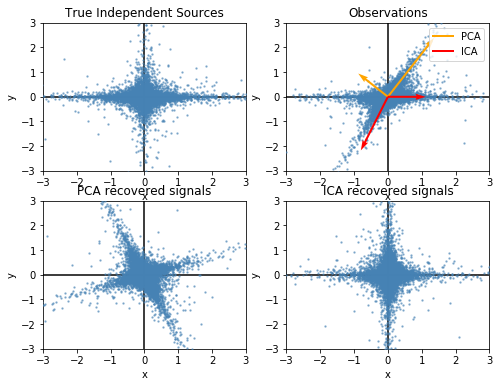

In [94]:
def plot_samples(S, axis_list=None):
    plt.scatter(S[:, 0], S[:, 1], s=2, marker='o', zorder=10,
                color='steelblue', alpha=0.5)
    if axis_list is not None:
        colors = ['orange', 'red']
        for color, axis in zip(colors, axis_list):
            axis /= axis.std()
            x_axis, y_axis = axis
            # Trick to get legend to work
            plt.plot(0.1 * x_axis, 0.1 * y_axis, linewidth=2, color=color)
            plt.quiver(0, 0, x_axis, y_axis, zorder=11, width=0.01, scale=6,
                       color=color)

    plt.hlines(0, -3, 3)
    plt.vlines(0, -3, 3)
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.xlabel('x')
    plt.ylabel('y')

plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
plot_samples(S / S.std())
plt.title('True Independent Sources')

axis_list = [pca.components_.T, ica.mixing_]
plt.subplot(2, 2, 2)
plot_samples(X / np.std(X), axis_list=axis_list)
legend = plt.legend(['PCA', 'ICA'], loc='upper right')
legend.set_zorder(100)

plt.title('Observations')

plt.subplot(2, 2, 3)
plot_samples(S_pca_ / np.std(S_pca_, axis=0))
plt.title('PCA recovered signals')

plt.subplot(2, 2, 4)
plot_samples(S_ica_ / np.std(S_ica_))
plt.title('ICA recovered signals')

<h2>Расщепление сигнала на компоненты.</h2>

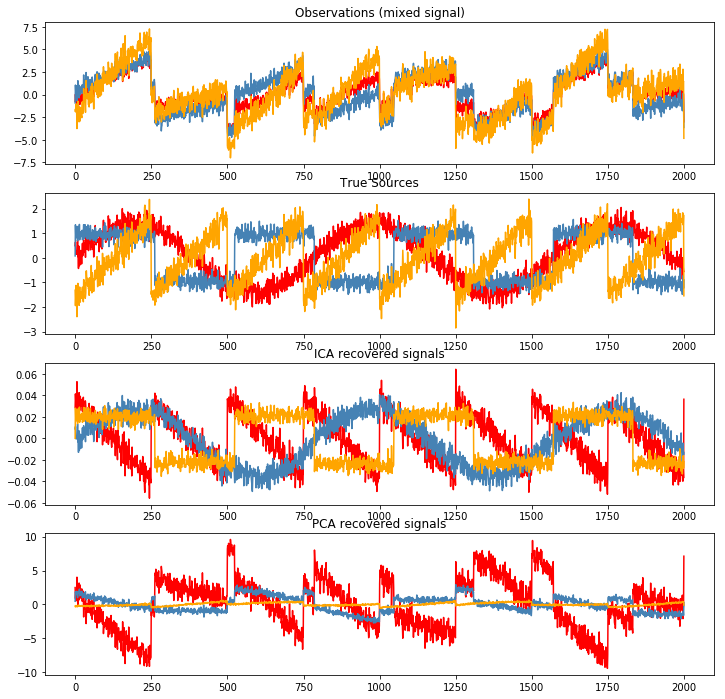

In [68]:
from scipy import signal

from sklearn.decomposition import FastICA, PCA

# #############################################################################
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

# #############################################################################
# Plot results

plt.figure(figsize=(12,12))

models = [X, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

In [69]:
X.shape

(2000, 3)

In [70]:
A_/(-46)

array([[ 1.00046695, -0.92408907, -0.98539225],
       [ 0.95780858, -0.46065901, -1.92730583],
       [ 1.99407572, -1.3425093 , -0.96907967]])

<h1>Словари</h1>

Distorting image...
Extracting reference patches...
done in 0.10s.
Learning the dictionary...
done in 6.92s.
Extracting noisy patches... 
done in 0.03s.
Orthogonal Matching Pursuit
1 atom...
done in 9.21s.
Orthogonal Matching Pursuit
2 atoms...
done in 19.24s.
Least-angle regression
5 atoms...
done in 108.45s.
Thresholding
 alpha=0.1...
done in 0.81s.


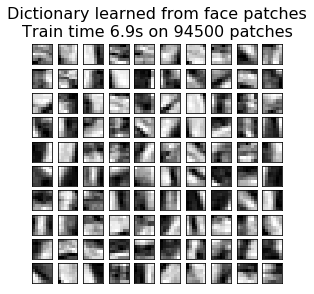

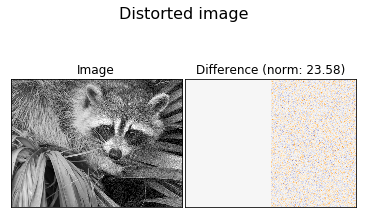

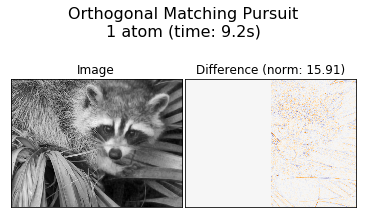

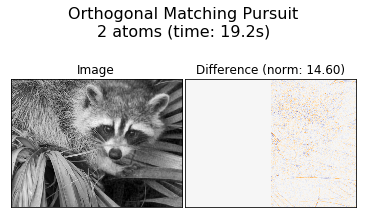

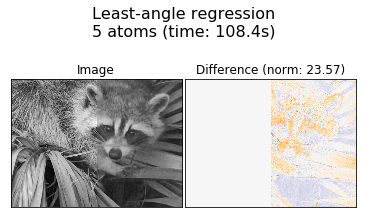

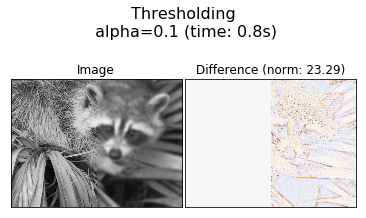

In [99]:
from time import time

import scipy as sp

from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.feature_extraction.image import reconstruct_from_patches_2d


try:  # SciPy >= 0.16 have face in misc
    from scipy.misc import face
    face = face(gray=True)
except ImportError:
    face = sp.face(gray=True)

# Convert from uint8 representation with values between 0 and 255 to
# a floating point representation with values between 0 and 1.
face = face / 255.

# downsample for higher speed
face = face[::2, ::2] + face[1::2, ::2] + face[::2, 1::2] + face[1::2, 1::2]
face /= 4.0
height, width = face.shape

# Distort the right half of the image
print('Distorting image...')
distorted = face.copy()
distorted[:, width // 2:] += 0.075 * np.random.randn(height, width // 2)

# Extract all reference patches from the left half of the image
print('Extracting reference patches...')
t0 = time()
patch_size = (7, 7)
data = extract_patches_2d(distorted[:, :width // 2], patch_size)
data = data.reshape(data.shape[0], -1)
data -= np.mean(data, axis=0)
data /= np.std(data, axis=0)
print('done in %.2fs.' % (time() - t0))

# #############################################################################
# Learn the dictionary from reference patches

print('Learning the dictionary...')
t0 = time()
dico = MiniBatchDictionaryLearning(n_components=100, alpha=1, n_iter=500)
V = dico.fit(data).components_
dt = time() - t0
print('done in %.2fs.' % dt)

plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(V[:100]):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape(patch_size), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('Dictionary learned from face patches\n' +
             'Train time %.1fs on %d patches' % (dt, len(data)),
             fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)


# #############################################################################
# Display the distorted image

def show_with_diff(image, reference, title):
    """Helper function to display denoising"""
    plt.figure(figsize=(5, 3.3))
    plt.subplot(1, 2, 1)
    plt.title('Image')
    plt.imshow(image, vmin=0, vmax=1, cmap=plt.cm.gray,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
    plt.subplot(1, 2, 2)
    difference = image - reference

    plt.title('Difference (norm: %.2f)' % np.sqrt(np.sum(difference ** 2)))
    plt.imshow(difference, vmin=-0.5, vmax=0.5, cmap=plt.cm.PuOr,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
    plt.suptitle(title, size=16)
    plt.subplots_adjust(0.02, 0.02, 0.98, 0.79, 0.02, 0.2)

show_with_diff(distorted, face, 'Distorted image')

# #############################################################################
# Extract noisy patches and reconstruct them using the dictionary

print('Extracting noisy patches... ')
t0 = time()
data = extract_patches_2d(distorted[:, width // 2:], patch_size)
data = data.reshape(data.shape[0], -1)
intercept = np.mean(data, axis=0)
data -= intercept
print('done in %.2fs.' % (time() - t0))

transform_algorithms = [
    ('Orthogonal Matching Pursuit\n1 atom', 'omp',
     {'transform_n_nonzero_coefs': 1}),
    ('Orthogonal Matching Pursuit\n2 atoms', 'omp',
     {'transform_n_nonzero_coefs': 2}),
    ('Least-angle regression\n5 atoms', 'lars',
     {'transform_n_nonzero_coefs': 5}),
    ('Thresholding\n alpha=0.1', 'threshold', {'transform_alpha': .1})]

reconstructions = {}
for title, transform_algorithm, kwargs in transform_algorithms:
    print(title + '...')
    reconstructions[title] = face.copy()
    t0 = time()
    dico.set_params(transform_algorithm=transform_algorithm, **kwargs)
    code = dico.transform(data)
    patches = np.dot(code, V)

    patches += intercept
    patches = patches.reshape(len(data), *patch_size)
    if transform_algorithm == 'threshold':
        patches -= patches.min()
        patches /= patches.max()
    reconstructions[title][:, width // 2:] = reconstruct_from_patches_2d(
        patches, (height, width // 2))
    dt = time() - t0
    print('done in %.2fs.' % dt)
    show_with_diff(reconstructions[title], face,
                    title + ' (time: %.1fs)' % dt)

In [100]:
V.shape

(100, 49)